In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from scipy.stats import chi2
import random
path = 'C:\\Users/Admin/Documents/GitHub/Data-Analysis-Practical-work/data/'
signal = np.load(path + 'signal_glitches.npy')
signal.shape

save_path = 'C:\\Users/Admin/Documents/GitHub/Data-Analysis-Practical-work/Fitting glitches/'

# <u>1. Read data and plot</u>

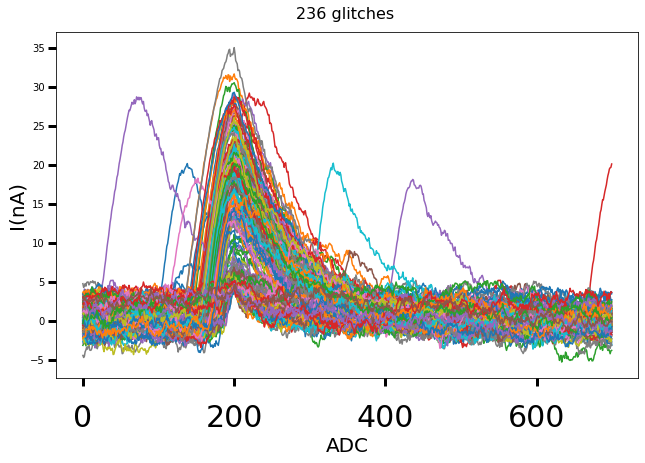

In [2]:
fig,ax = plt.subplots(figsize=(9,6))
for i in range(len(signal[:,0])):
    ax.plot(signal[i,:])
ax.set_title(label=str(len(signal[:,0])) + ' glitches ', y = 1.02, fontsize=16)

plt.xlabel('ADC', fontsize=20)
plt.ylabel('I(nA)', fontsize=20)
plt.tight_layout()
plt.tick_params(axis='x', labelsize=30, which='major', pad=18)
plt.tick_params(which='both', width=3)
plt.tick_params(which='major',length =8)
plt.tick_params(which='minor', length=4)
plt.savefig('Signal glitches.png',facecolor='w', dpi=600)

# <u>2. Fit data with exponential model</u>

- Fitting function:
## $S(t) = a(1-\exp(\frac{-(t-t_{0})}{\tau_0})(\exp(\frac{-(t-t_{0})}{\tau_1}) +c$
- Apart from the exponential function, I also use a linear function to fit data in the range that <b><u>COULD NOT BE FITTED</u></b> by Exponential function

In [3]:
def expo_fit(t,a,t0,tau0,tau1,c):
    S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
    return S
def linear_fit(t,d,e):
    return d*t +e

One glitch can be separated into 2 parts: the part could be fitted by exponential function and the part that could not be fitted by exponential function.
Because 236 glitches have different peaks, so first I find t where the peak happens (by using forward derivative, the highest derivative gives the peak)

In [18]:
d = 300

In [19]:
t = np.arange(0,d)
p = []
dy_dx = np.zeros(shape=(236,d))
dmax = np.zeros(236)
for i in range(0,236):
    dy_dx[i,:] = np.gradient(signal[i,0:d],t[0:d])
for i in range(0,236):
    dmax[i] = np.max(dy_dx[i,:])
for i in range(236):
    p.append(np.where(dy_dx[i] == dmax[i])[0][0])
print(len(p))

peak = np.array(p)
print(peak.shape)
print(peak)

result = np.where(peak==0)
print(result)

236
(236,)
[ 36 135  17 138 176 143 181 157 100 174 167 138 187 182 162 165 177 158
 172 185 100 172 170 166  66  36 180 164 154 169 271 292 163 162 177 167
 127 156 173 171 180 168  60 190 158  82 155 171 157 171 173  44 183 167
 161 165  17 131 121 167 184 172 180 169 187 174 179  99 150 187 295 161
 170  96 154 163 161 159 169  40 104 166 180 167 159 168 171 176 133 282
 168 166 155 192 165   0 133 164 177 172 115 155   5 169 190 174 158 171
 186 169 136 225 155 166 196 157 176 189 107 101 186 169 182 160  31 163
  58 167  44 167 183 168 177  77  92 156 193  60 190 161 171 159 188 164
 224  44 161 161 171 174 126 192 199 171 264 199 122 122 163 168 110 222
 177 280 168 180 173  93  56 160 166 196 165 276 187 184 155 175 178 199
 167 168 199 172 168 181 178 135 170   0 173 192 169 174 182 171 160 172
 167 173 174 154 167 150 169 186 190 172 179 165 196 114 169 144 171 187
  30 164 169 165 150 171   0  77 191 170 269 162 166 163 180 178 168 241
  36 149]
(array([ 95, 189, 222], dtype=

- <b>The range from 0 to $t_{peak}$ will be fitted by linear function, the remaining by exponential function.</b>
- <b>Input a number i to plot a signal and its fitting model</b>

 34


[ 5.32260093e+03 -1.85588889e+00  1.15971852e+04  3.48849285e+01
 -5.70145639e-02]


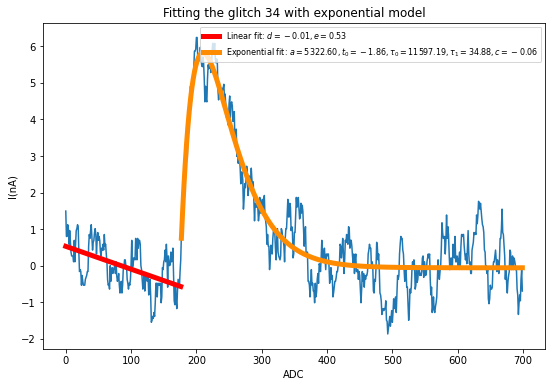

In [6]:
i = int(input())
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(signal[i,:])
#bounds & fit range
if peak[i] == 0:
    peak[i] = 180
    
b1=int(peak[i])
b2=700
y = signal[i,b1:b2]
t = np.arange(b1,b2)

y1 = signal[i,:b1]
t1 = np.arange(0,b1)
    
popt, pcov = curve_fit(linear_fit, t1-t1[0], y1)
plt.plot(t1, linear_fit(t1-t1[0], *popt), color='red',linewidth=5,label= r'Linear fit: $d=%.2f, e=%.2f$' % tuple(popt))
    
popt, pcov = curve_fit(expo_fit, t-t[0],y, maxfev=20000000)
plt.plot(t, expo_fit(t-t[0], *popt), color='darkorange',linewidth=5,label= r'Exponential fit: $a=%.2f, t_0=%.2f, \tau_0=%.2f, \tau_1=%.2f, c=%.2f$' % tuple(popt))
print(popt)
plt.xlabel('ADC')
plt.ylabel('I(nA)')
plt.legend(loc='upper right',fontsize=8)
title = 'Fitting the glitch ' +str(i)+ ' with exponential model'
plt.title(title)
plt.show()

In [7]:
def fitting(i):
    #ax.plot(signal[i,:])
    #bounds & fit range
    if peak[i] == 0:
        peak[i] = 180
    
    b1=int(peak[i])
    b2=700
    y = signal[i,b1:b2]
    t = np.arange(b1,b2)

    y1 = signal[i,:b1]
    t1 = np.arange(0,b1)
    
    popt1, pcov1 = curve_fit(linear_fit, t1-t1[0], y1)    
    popt2, pcov2 = curve_fit(expo_fit, t-t[0],y, maxfev=20000000)
    return popt1,popt2

[[187 235 183  12]
 [ 51  63  64 118]
 [113   9 132  26]
 [199  38 119  86]]


C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in multiply
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in exp
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in multiply
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: invalid value encountered in multiply
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in exp
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c


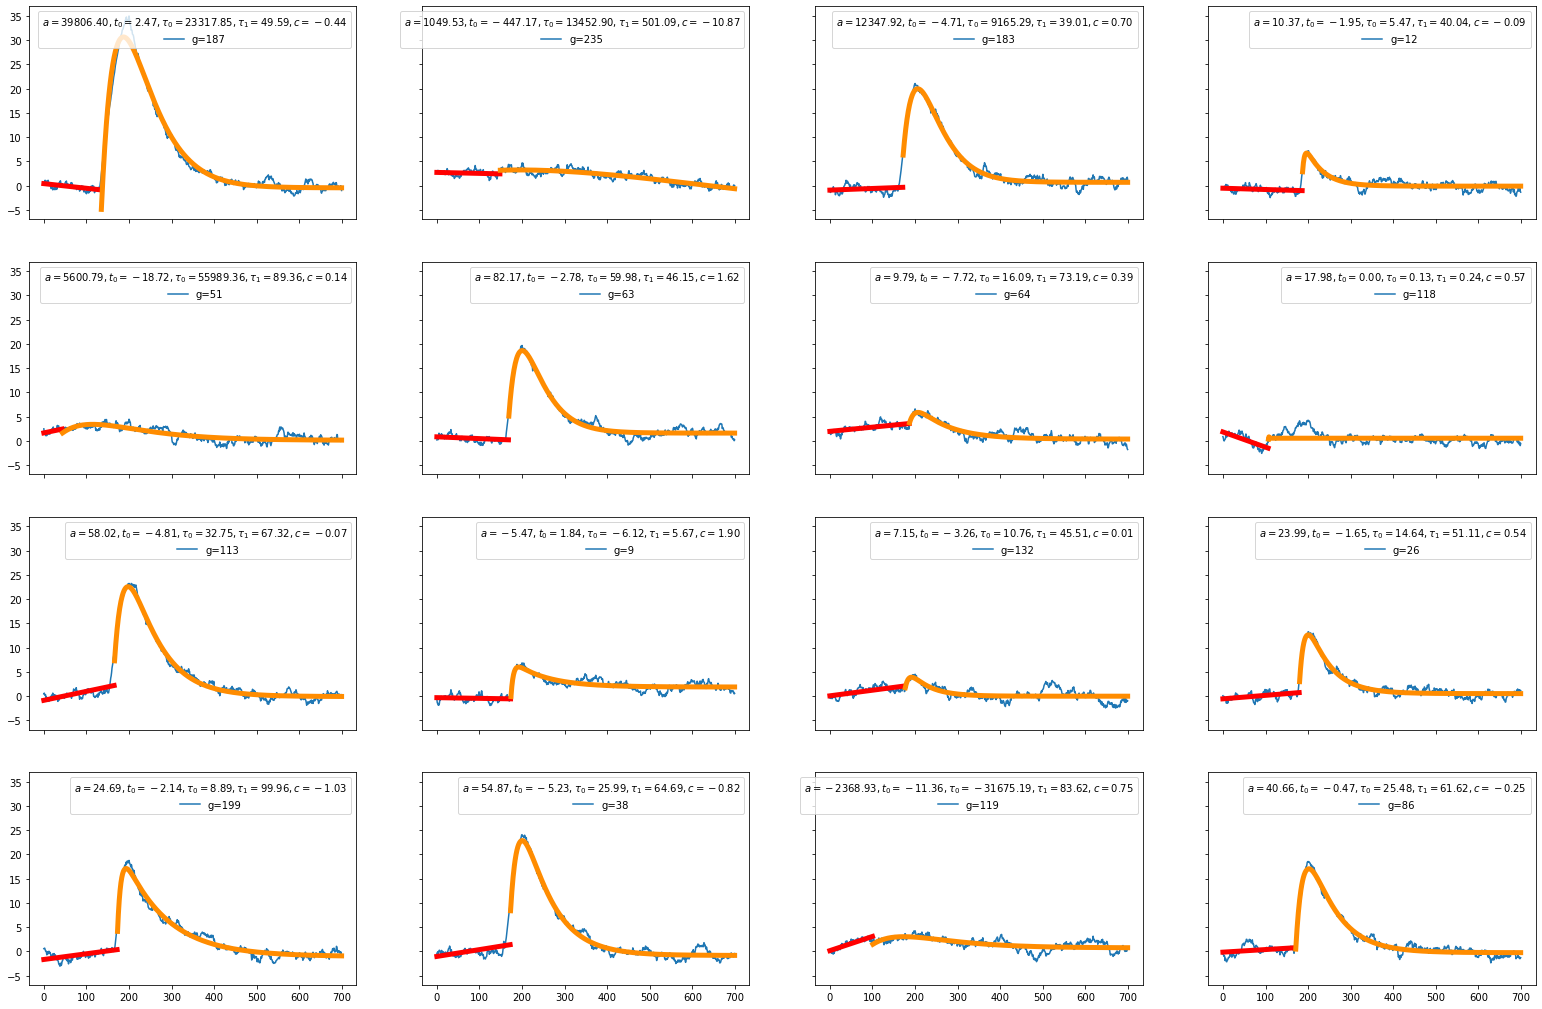

In [8]:
x = np.random.randint(236, size=(4,4))
print(x)
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(27,18))
for i in range(4):
    for j in range(4):
        axs[i,j].plot(signal[x[i,j],:], label = 'g='+ str(x[i,j]))
        n = x[i,j]
        if peak[n] == 0:
            peak[n] = 180
    
        b1=int(peak[n])
        b2=700
        y = signal[n,b1:b2]
        t = np.arange(b1,b2)

        y1 = signal[n,:b1]
        t1 = np.arange(0,b1)
        
        popt1 = fitting(x[i,j])[0]
        popt2 = fitting(x[i,j])[1]
        axs[i,j].plot(t1, linear_fit(t1-t1[0], *popt1), color='red',linewidth=5)
        axs[i,j].plot(t, expo_fit(t-t[0], *popt2), color='darkorange',linewidth=5)
        legend = axs[i,j].legend(title = r'$a=%.2f,t_0=%.2f,\tau_0=%.2f,\tau_1=%.2f,c=%.2f$' % tuple(popt2), loc='upper right',fontsize=10)
        legend.get_title().set_fontsize('10')
plt.savefig('Random_16_plots.png',facecolor='w',dpi=600)

## RUN ALL SIGNALS AND THEIR FITTING MODELS (<u>skip to save time</u>)

## (I saved the plots in save_path directory)

In [9]:
for i in range(236):
    fig,ax = plt.subplots(figsize=(9,6))
    ax.plot(signal[i,:])
    #bounds & fit range
    if peak[i] == 0:
        peak[i] = 180
    
    b1=int(peak[i])
    b2=700
    y = signal[i,b1:b2]
    t = np.arange(b1,b2)

    y1 = signal[i,:b1]
    t1 = np.arange(0,b1)
    
    popt, pcov = curve_fit(linear_fit, t1-t1[0], y1)
    plt.plot(t1, linear_fit(t1-t1[0], *popt), color='red',linewidth=5,label= r'Linear fit: $d=%.2f, e=%.2f$' % tuple(popt))
    
    popt, pcov = curve_fit(expo_fit, t-t[0],y, maxfev=20000000)
    plt.plot(t, expo_fit(t-t[0], *popt), color='darkorange',linewidth=5,label= r'Exponential fit: $a=%.2f, t_0=%.2f, \tau_0=%.2f, \tau_1=%.2f, c=%.2f$' % tuple(popt))
    plt.xlabel('ADC')
    plt.ylabel('I(nA)')
    plt.legend(loc='upper right',fontsize=8)
    title = 'Fitting the glitch ' +str(i)+ ' with exponential model'
    plt.title(title)
    plt.savefig(save_path + 'Glitch'+str(i) + '.png',facecolor='w', dpi=600)
    plt.close(fig)

C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in exp
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in exp
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in exp
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in exp
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in multiply
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encounte

# <u>3. Calculate Chi-square $(\chi^2)$ for every events</u>

In [20]:
E = np.zeros(shape=(236,700))
for i in range(236):
    if peak[i] == 0:
        peak[i] = 180
    
    b1=int(peak[i])
    b2=700
    y = signal[i,b1:b2]
    t = np.arange(b1,b2)

    y1 = signal[i,:b1]
    t1 = np.arange(0,b1)
    popt1=fitting(i)[0]
    popt2=fitting(i)[1]
    for j in range(0,b1):
        E[i,:b1] = linear_fit(t1,*popt1)
                
    for j in range(b1,b2):
        E[i, b1:b2] = expo_fit(t,*popt2) 
print(E)

C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in exp
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: overflow encountered in multiply
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c
C:\Users\Admin\AppData\Local\Temp/ipykernel_10096/4162375767.py:2: RuntimeWarning: invalid value encountered in multiply
  S = a*(1-np.exp(-(t-t0)*(1/tau0)))*(np.exp(-(t-t0)*(1/tau1))) + c


[[-1.55290759 -1.55114291 -1.54937823 ...  1.98605809  1.98516395
   1.98427256]
 [ 0.1043859   0.10204929  0.09971269 ... -0.37567356 -0.37586031
  -0.3760447 ]
 [ 1.36833238  1.38932028  1.41030817 ... -0.10157257 -0.11026321
  -0.1189604 ]
 ...
 [ 2.25541405  2.25541312  2.25541218 ...  5.41714063  5.42514764
   5.4331546 ]
 [ 2.09139842  2.06301247  2.03462652 ... -0.42942919 -0.43008774
  -0.43074133]
 [ 2.74257881  2.74058117  2.73858352 ... -2.14383205 -2.15393367
  -2.16403022]]


In [21]:
O = signal
O1 = np.transpose(np.array(signal))
F= np.transpose(E)

chisq, pvalue = chisquare(O1,F,ddof=5)
chisq = np.array(chisq)
p_value = np.array(pvalue)
print(chisq)
#print(p_value.shape)
print(min(chisq))
#print(p_value)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
[ 9.97115935e-02  2.52872668e+00  2.97561077e-02  1.70230916e+00
 -1.04529097e+01  1.18718538e+00 -2.43518955e+00  5.96950254e+00
  3.37865282e-01  3.53374953e-01 -7.28779812e-01  5.20628074e-01
 -1.94612113e+00  1.45673362e+01  1.01721432e+01  5.81220690e+00
  4.00988086e+00  1.15255966e+01  2.06059224e+03 -1.20886445e+00
  9.65616577e-01  4.13001296e+00 -8.21992367e+00  4.19110930e+00
  1.25643721e-01  8.84901086e-02  2.74272290e+00 -8.30540670e+01
  2.67178478e+00  1.36061009e+01  9.76315445e-03 -5.47693713e-01
  5.00859142e+00 -1.17366069e+01 -4.13002428e+01 -3.84893162e+00
  1.08569895e+00  5.53015873e-01 -1.31893379e+01  1.45868751e+01
 -8.47617006e+00 -1.27512857e+01 -3.30514722e-01  1.30998282e+01
  3.74140211e+00  6.05869361e-02  1.21304782e+00  9.18723718e+00
  5.54937576e+00  2.12275662e+00  1.39230676e+00  1.25858041e-01
 -1.52337467e+02  6.33816081e+01  1.64221019e+00  7.41356159e+00
  3.02480917e-03  1.74682621e+00  2.39740380e-03 -2.46056208e+00
  3.62461998e+01  2.56551746e+00  2.10725341e+01  1.49113779e+00
  6.78758337e-01 -7.29175215e+00  2.98864236e+00  1.40259111e+00
  1.05397477e+01 -1.36768007e+00  6.83399054e-03  7.30649546e+00
  2.09317138e+00  4.57483198e-01  6.45278488e+00  1.19290149e+01
 -1.80486635e+01 -1.87457650e+00  9.52662106e+00  1.21734779e-01
  2.73589410e-04  3.00058348e+00  1.03419397e+01  7.73507149e-01
  2.13439046e+00 -1.72600490e+01  2.00749740e+01 -8.28204807e-01
  4.84250194e-01  5.02994346e-02  4.80567306e+00  5.02693767e+00
  3.15790270e+00  1.86041878e+00  6.35168744e-01  7.58870422e-01
  3.14934221e-01  1.63143332e+01  8.37407864e-01  1.84183307e+01
  1.64128149e+00  5.01202701e+00  1.26350316e-03  6.25181633e+00
 -8.89790617e-01  2.07308112e+00  4.68436918e+00  2.30087649e+00
  1.11362261e+00 -1.60141273e+00 -1.52278830e+00  1.96269129e-01
  4.35569285e+00  5.95090998e+00  3.40382471e+00  2.69812347e+00
 -4.75695322e+00  6.14965968e-01  2.75260112e-04  2.10199264e-01
  3.25727725e-01  6.82615973e+00 -6.21945221e+00  3.56254337e+00
  2.01440031e-01  3.55542268e+00  1.92866297e-01 -1.18980842e+00
  7.36840530e-02 -4.43664049e+00 -1.51373868e+00  1.31772412e+01
  1.24865832e+00  1.36578072e-01  3.34069805e-01  1.95436460e+01
  9.75283625e-02  2.30554934e-01 -1.33466245e+00  1.49383010e+01
 -1.11847711e+01  2.90757040e+01 -2.62973627e+00  1.28144306e+01
  2.22060777e+00  3.46095436e-03 -5.74134180e+02 -3.78341730e+00
  4.83536845e+01 -2.42877402e+00  5.73332186e-02  3.87152715e-01
  1.28833354e+01  1.96455894e+01  2.08795706e-03 -6.83256949e+01
  3.71251052e+00  2.63933640e-02 -1.06146325e+01  2.90266052e+00
  7.00368050e-03  7.23169688e-01 -1.06893278e+00  1.35280513e-01
 -2.38096066e+00  4.72489965e-01  1.48831316e+01  8.00177986e-01
  6.47121960e-04  4.63941150e+00 -1.12437172e+00  1.09689449e+00
  8.36614153e-01  6.73556916e-01  2.28483317e+00  2.25037667e+00
  1.22596092e+00 -4.23423317e+00 -4.87814245e+00  1.59207159e-01
  1.78181212e+01 -5.62002787e+00  2.79391341e-01  4.95626703e+00
  7.88741625e+00  1.61228928e+01 -4.89664074e+00  3.93575062e+00
 -3.51888640e+02  1.15273227e+01  5.48574071e+00 -3.38882143e+00
 -2.00878153e+01  2.73162231e+00 -4.36534481e+00  6.12204451e+00
  3.13708097e+00 -7.17361586e+00  7.09273604e+00 -8.08397750e+00
 -3.02638330e+00  2.53369065e+00  6.92185531e+00  5.79458897e+00
 -3.02437427e+00 -2.43446790e+01  1.23047484e+01 -9.19264388e+00
 -1.76997107e+00  1.03809057e+01  1.79169550e+00  3.58215743e-01
  6.78529490e+00  5.84434340e+00  3.24342603e+00 -1.21602991e+00
  7.87777207e-02  6.11209861e+00  4.76127340e+00  4.74981071e+00
  6.49513093e+00 -6.96730034e+00  1.05952437e+00  3.70110749e-01
  3.36787332e+00  1.15524509e+01  1.51244242e+00  3.75360770e+01
  4.28545877e+00 -1.49026076e+02 -2.24981567e+00  4.14482433e+00
  1.97352587e+00  6.80010191e-01  1.48690728e-01  9.44366999e-01]

# <u>4. Draw a chi-square distribution base on the degree of freedom = size(data) - number of parameters</u>

Text(0.5, 0, '$\\chi^2$')

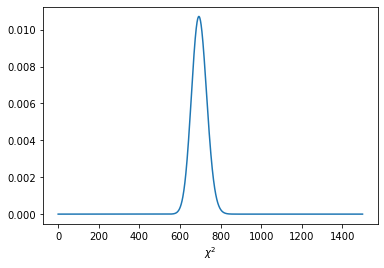

In [12]:
x=np.arange(0,1500,1)
plt.plot(x, chi2.pdf(x,df=695))
plt.xlabel(r'$\chi^2$')

# <b><u>5. Select good dataset using chi-square distribution evaluation</u></b>

- Choose data with p-value > 0.01

In [13]:
#print(p_value)
k = []
index = [] # index of signals of the good dataset
t = np.arange(0,700)
for i in range(len(p_value)):
    if p_value[i] > 0.01:
        k.append(O[i,:])
        index.append(i)
index = np.array(index)
print(index.shape)
print(index)
K = np.array(k)
print(K.shape)
for i in range(len(K)):
    plt.plot(t,K[i])
plt.xlabel('ADC')
plt.ylabel('I(nA)')
plt.savefig('Chosen data.png',facecolor='w',dpi=600)

NameError: name 'p_value' is not defined

# <u>6. Plot the histogram of estimated parameters of good data</u>

In [17]:
a = []
t0 = [] 
tau0 = [] 
tau1 = []
c = []

for i in range(0,len(index)):
    j = index[i]
    if peak[j] == 0:
        peak[j] = 180
    b1 = int(peak[j])
    b2 = 700
    y = signal[j,b1:b2]
    t = np.arange(b1,b2)
        
    popt2, pcov2 = curve_fit(expo_fit, t-t[0], y, maxfev=20000000)
    
    a.append(popt2[0])
    t0.append(popt2[1])
    tau0.append(popt2[2])
    tau1.append(popt2[3])
    c.append(popt2[4])
    

a = np.array(a)
t0 = np.array(t0)
tau0 = np.array(tau0)
tau1 = np.array(tau1)
c = np.array(c)

print(np.max(a),np.min(a))
print(np.max(t0),np.min(t0))
print(np.max(tau0),np.min(tau0))
print(np.max(tau1),np.min(tau1))
print(np.max(c),np.min(c))

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(ncols = 5, figsize = (22,4))
ax0.set_xlim(-30000,180000)
ax0.hist(a)
ax0.set_xlabel(r'$a$',fontsize=15)
ax0.set_ylabel('Counts',fontsize=15)

ax1.set_xlim(-40000,370000)
ax1.hist(t0)
ax1.set_xlabel(r'$t_0$',fontsize=15)
ax1.set_ylabel('Counts',fontsize=15)

#ax2.set_xlim(-32000,620000)
ax2.hist(tau0)
ax2.set_xlabel(r'$\tau_0$',fontsize=15)
ax2.set_ylabel('Counts',fontsize=15)

ax3.set_xlim(0,200000)
ax3.hist(tau1)
ax3.set_xlabel(r'$\tau_1$',fontsize=15)
ax3.set_ylabel('Counts',fontsize=15)

ax4.set_xlim(-80000,1000)
ax4.hist(c)
ax4.set_xlabel(r'$c$',fontsize=15)
ax4.set_ylabel('Counts',fontsize=15)

fig.suptitle('Histogram of estimated parameters of chosen data', fontsize=20)
plt.savefig('Histogram.png',facecolor = 'w',dpi=600)

# <u><b>7. Plot 2D joint confidence region of $\tau_0$ and $\tau_1$</b></u>

In [ ]:
tau0 = [] 
tau1 = []

for i in range(236):
    popt2 = fitting(i)[1]
    tau0.append(popt2[2])
    tau1.append(popt2[3])
tau0 = np.array(tau0)
tau1 = np.array(tau1)

print(max(tau0),min(tau0))
print(max(tau1),min(tau1))

In [ ]:
bins=50
fig,axs = plt.subplots(1,2,figsize=(18,9))
axs[0].hist(tau0,bins)
axs[1].hist(tau1,bins)

In [ ]:
def chisq_cal(k,p,tau0,tau1):
    tau0,tau1 = p[0],p[1]
    sp = peak[k]
    if peak[k] == 0:
        sp = 180
    b1 = int(sp)
    b2 = 700
    y = signal[k,b1:b2]
    t = np.arange(b1,b2)
        
    popt2, pcov2 = curve_fit(expo_fit, t-t[0], y, maxfev=20000000)

    t = np.linspace(0,700-sp,700-sp)
    csq = chisquare(signal[k,sp:700], expo_fit(t,popt2[0],popt[1],tau0,tau1,popt[4]), ddof=4)
    return csq[0]

In [ ]:
tau0_min,tau0_max,n0 = -32000,620000,400
tau1_min,tau1_max,n1 = 0,200000,400

d0,d1 = (tau0_max-tau0_min)/n0,(tau1_max-tau1_min)/n1
#print(d0,d1)

tau0_lst = np.linspace(tau0_min+0.5*n0, tau0_max-0.5*n0,n0)
tau1_lst = np.linspace(tau1_min+0.5*n1, tau1_max-0.5*n1,n1)
#print(tau0_lst.shape)
chi2 = np.zeros(shape = (n0,n1))

for i in range(n0):
    for j in range(n1):
        p0 = [tau0_lst[i],tau1_lst[j]]
        chi2[i,j] = chisq_cal(188,p0,tau0,tau1)

print(min(chi2))
print(min(chisq))
print('Minimum chi-square: ', min(chi2))
print(np.where(chi2==min(chi2)))
print(np.where(chisq==min(chisq)))

## Best fitting value of tau0, tau1
popt2 = fitting(188)[1]
b_tau0 = popt[2] 
b_tau1 = popt[3]
print("Best fitting value of \u03C40: ", b_tau0)
print("Best fitting value of \u03C41: ", b_tau1)

clst = np.array([0.,5.89,11.3,18.2])
clst += min(chi2)
print('confident region',clst)

# Make a contour plot of these chi-squared values
tau0_lst2,tau1_lst2 = np.meshgrid(tau0_lst,tau1_lst,indexing='ij')
print(tau0_lst2,tau1_lst2)

fig, ax = plt.subplots(figsize=(15, 10))
ax.contour(tau0_lst2, tau1_lst2, chi2, levels=clst, linewidths=2.5)   #,cmap='rainbow' ) #,colors='k')
ax.contourf(tau0_lst2, tau1_lst2, chi2, levels=clst,cmap='rainbow') #,colors='k')


# Indicate the best-fitting model parameters
ax.plot([b_tau0],[b_tau1],marker='o',markersize=15,color='red',linestyle='None')

ax.set_xlabel(r'$\tau_0$')
ax.set_ylabel(r'$\tau_1$')
#ax.set_title('Join confident',fontsize=28,y=1.02)
plt.grid(ls='--', alpha=0.3)
